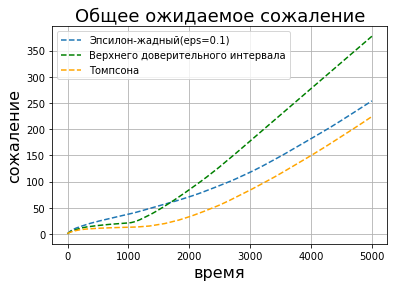

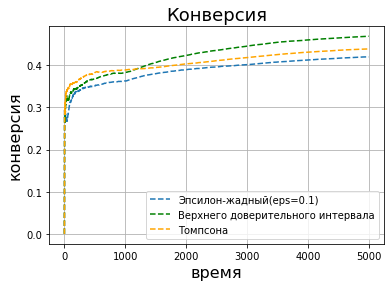

In [10]:
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import matplotlib.patches as mpatches

p = []
p.append(float(0.1))
p.append(float(0.3))
p.append(float(0.4))
n = len(p)

p_2 = []

#p_2.append(float(0.1))
#p_2.append(float(0.5))
#p_2.append(float(0.4))

p_2.append(float(0.1))
p_2.append(float(0.5))
p_2.append(float(0.4))

n_show = 5000  # количество показов
n_start = 50  # количество запусков


# ------------------ОБЩИЕ ФУНКЦИИ-----------------------

# функция показа страницы
def show_page(number_page, reward_show, number_show, p_show):
    p = p_show
    reward_show[number_page] += bernoulli.rvs(p[number_page])
    number_show[number_page] += 1
    return 0

# вычисление функции сожаления
# принимает массив выбираемых страниц
def regret(par_list):
	# поиск индекса лучшей страницы
	temp_best_index_page = p.index(max(p))
	temp_regret_list = [0 for i in range(n_show)]
	for i in range(n_show):
		j, temp_var = 0, 0
		while j < i:
			temp_var += p[par_list[j]]
			j += 1
		temp_regret_list[i] = i * p[temp_best_index_page] - temp_var
	return temp_regret_list


# ------------------EPSILON-GREEDY-----------------------

epsilon = 0.1
sum_regret_list_e_greedy = [0 for i in range(n_show)]
sum_reward_show_e_greedy = [0 for i in range(n)]  # награда от показа страницы
sum_number_show_e_greedy = [1 for i in range(n)]  # количество показов страниц
sum_ctr_e_greedy = [0 for i in range(n)]  # click-through-rate
sum_mean_ctr_list_e_greedy = [0 for i in range(n_show)]


# функция алгоритма epsilon-greedy
def e_greedy(epsilon):
	x = random.random()
	# формируем массив ctr
	for i in range(n):
		ctr_e_greedy[i] = reward_show_e_greedy[i] / number_show_e_greedy[i]

	# ищем лучшую страницу
	best_page_index = ctr_e_greedy.index(max(ctr_e_greedy))

	if x < 1 - epsilon:
		return best_page_index
	else:
		best_page_index = random.randint(0, n - 1)
		return best_page_index


# -------------------------UCB1----------------------------

sum_regret_list_ucb = [0 for i in range(n_show)]
sum_reward_show_ucb = [0 for i in range(n)]  # награда от показа страницы
sum_number_show_ucb = [1 for i in range(n)]  # количество показов страниц
sum_ctr_ucb = [0 for i in range(n)]  # click-through-rate
sum_mean_ctr_list_ucb = [0 for i in range(n_show)]

def ucb(t):
	# формируем массив ctr
	for i in range(n):
		ctr_ucb[i] = reward_show_ucb[i] / number_show_ucb[i]

	max_temp = reward_show_ucb[0] / number_show_ucb[0] + 0.5 * math.sqrt(2 * math.log(t) / number_show_ucb[0])
	best_page_index = 0
	temp = [0 for i in range(n)]
	for i in range(n):
		temp[i] = reward_show_ucb[i] / number_show_ucb[i] + 0.5 * math.sqrt(2 * math.log(t) / number_show_ucb[i])
		if temp[i] > max_temp:
			max_temp = temp[i]
			best_page_index = i
	return best_page_index

# ---------------------Thompson Sampling--------------------

sum_regret_list_sampling = [0 for i in range(n_show)]
sum_reward_show_sampling = [0 for i in range(n)]  # награда от показа страницы
sum_number_show_sampling = [1 for i in range(n)]  # количество показов страниц
sum_ctr_sampling = [0 for i in range(n)]  # click-through-rate
sum_mean_ctr_list_sampling = [0 for i in range(n_show)]


def thompson_sampling():
	# формируем массив ctr
	for i in range(n):
		ctr_sampling[i] = reward_show_sampling[i] / number_show_sampling[i]

	# считаем вероятности и находим max
	maximum, best_page_index, i = 0, 0, 0
	while i < n:
		beta_rasp = random.betavariate(reward_show_sampling[i] + 1, number_show_sampling[i] - reward_show_sampling[i] + 1)
		if beta_rasp > maximum:
			maximum = beta_rasp
			best_page_index = i
		i += 1
	return best_page_index



# главный цикл
# все алгоритмы в одном цикле
n_count = 0
while n_count < n_start:
    # для epsilon-greedy 1
    reward_show_e_greedy = [0 for i in range(n)]  # награда от показа страницы
    number_show_e_greedy = [1 for i in range(n)]  # количество показов страниц
    ctr_e_greedy = [0 for i in range(n)]  # click-through-rate
    page_in_time_e_greedy = [0 for i in range(n_show)]
    mean_ctr_list_e_greedy = [0 for i in range(n_show)]

    # для UCB1
    reward_show_ucb = [0 for i in range(n)]  # награда от показа страницы
    number_show_ucb = [1 for i in range(n)]  # количество показов страниц
    ctr_ucb = [0 for i in range(n)]  # click-through-rate
    page_in_time_ucb = [0 for i in range(n_show)]
    mean_ctr_list_ucb = [0 for i in range(n_show)]

    # для Thompson Sampling
    reward_show_sampling = [0 for i in range(n)]  # награда от показа страницы
    number_show_sampling = [1 for i in range(n)]  # количество показов страниц
    ctr_sampling = [0 for i in range(n)]  # click-through-rate
    page_in_time_sampling = [0 for i in range(n_show)]
    mean_ctr_list_sampling = [0 for i in range(n_show)]

    t = 1
    while t < n_show:
        if t == 1:
            page_index = 0
        if t == 2:
            page_index = 1
        if t == 3:
            page_index = 2
        
        if t <= n_show / 5:
            p_show = p
        else:
            p_show = p_2
    
        mean_ctr = 0
        # epsilon-greedy
        if t > 3:
            page_index = e_greedy(epsilon)
        page_in_time_e_greedy[t] = page_index
        show_page(page_index, reward_show_e_greedy, number_show_e_greedy, p_show)

        for i in range(n):
            mean_ctr += reward_show_e_greedy[i]

        mean_ctr_list_e_greedy[t] = mean_ctr / t

        # UCB1
        mean_ctr = 0
        if t > 3:
            page_index = ucb(t)
        page_in_time_ucb[t] = page_index
        show_page(page_index, reward_show_ucb, number_show_ucb, p_show)

        for i in range(n):
            mean_ctr += reward_show_ucb[i]

        mean_ctr_list_ucb[t] = mean_ctr / t

        # Thompson Sampling
        mean_ctr = 0
        if t > 3:
            page_index = thompson_sampling()
        page_in_time_sampling[t] = page_index
        show_page(page_index, reward_show_sampling, number_show_sampling, p_show)

        for i in range(n):
            mean_ctr += reward_show_sampling[i]

        mean_ctr_list_sampling[t] = mean_ctr / t

        t += 1

    # вычисление вектора сожаления
    regret_list_e_greedy = regret(page_in_time_e_greedy)
    regret_list_ucb = regret(page_in_time_ucb)
    regret_list_sampling = regret(page_in_time_sampling)

	# вычисление суммарного вектора сожаления
    for i in range(n_show):
        sum_regret_list_e_greedy[i] += regret_list_e_greedy[i]
        sum_regret_list_ucb[i] += regret_list_ucb[i]
        sum_regret_list_sampling[i] += regret_list_sampling[i]

        # вычисление среднего ctr
        sum_mean_ctr_list_e_greedy[i] += mean_ctr_list_e_greedy[i]
        sum_mean_ctr_list_ucb[i] += mean_ctr_list_ucb[i]
        sum_mean_ctr_list_sampling[i] += mean_ctr_list_sampling[i]

    for i in range(n):
        # epsilon-greedy
        sum_number_show_e_greedy[i] += number_show_e_greedy[i]
        sum_reward_show_e_greedy[i] += reward_show_e_greedy[i]
        sum_ctr_e_greedy[i] += ctr_e_greedy[i]


        # ucb1
        sum_number_show_ucb[i] += number_show_ucb[i]
        sum_reward_show_ucb[i] += reward_show_ucb[i]
        sum_ctr_ucb[i] += ctr_ucb[i]

        # thompson sampling
        sum_number_show_sampling[i] += number_show_sampling[i]
        sum_reward_show_sampling[i] += reward_show_sampling[i]
        sum_ctr_sampling[i] += ctr_sampling[i]

    n_count += 1


for i in range(n_show):
	# regret
	sum_regret_list_e_greedy[i] /= n_start
	sum_regret_list_ucb[i] /= n_start
	sum_regret_list_sampling[i] /= n_start

	# ctr
	sum_mean_ctr_list_e_greedy[i] /= n_start
	sum_mean_ctr_list_ucb[i] /= n_start
	sum_mean_ctr_list_sampling[i] /= n_start


for i in range(n):
	sum_reward_show_e_greedy[i] /= n_start
	sum_number_show_e_greedy[i] /= n_start
	sum_ctr_e_greedy[i] /= n_start

	sum_reward_show_ucb[i] /= n_start
	sum_number_show_ucb[i] /= n_start
	sum_ctr_ucb[i] /= n_start

	sum_reward_show_sampling[i] /= n_start
	sum_number_show_sampling[i] /= n_start
	sum_ctr_sampling[i] /= n_start


# вывод на график


time = [i for i in range(n_show)]
plt.figure(1)
plt.plot(time, sum_regret_list_e_greedy, linestyle='--', label='Эпсилон-жадный(eps=' + str(epsilon) + ')')
plt.plot(time, sum_regret_list_ucb, linestyle='--', color='green', label='Верхнего доверительного интервала')
plt.plot(time, sum_regret_list_sampling, linestyle='--', color='orange', label='Томпсона')
plt.title('Общее ожидаемое сожаление', fontsize=18)
plt.xlabel('время', fontsize=16)
plt.ylabel('сожаление', fontsize=16)
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig('изменение_сожаление_10.png')
plt.show()

# второй график
plt.figure(2)
plt.plot(time, sum_mean_ctr_list_e_greedy, linestyle='--', label='Эпсилон-жадный(eps=' + str(epsilon) + ')')
plt.plot(time, sum_mean_ctr_list_ucb, linestyle='--', color='green', label='Верхнего доверительного интервала')
plt.plot(time, sum_mean_ctr_list_sampling, linestyle='--', color='orange', label='Томпсона')

plt.title('Конверсия', fontsize=18)
plt.xlabel('время', fontsize=16)
plt.ylabel('конверсия', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('изменение_конверсия_10.png')
plt.show()

In [11]:
# вывод данных epsilon-greedy
print('-----Epsilon-greedy(eps=' + str(epsilon) + ')-----')
print('number of show = ', sum_number_show_e_greedy)
print('ctr of pages = ', sum_ctr_e_greedy)
print('mean ctr = ', sum_mean_ctr_list_e_greedy[n_show - 1])
print('\n')

# вывод данных UCB
print('-----------UCB(h = 1)------------')
print('number of show = ', sum_number_show_ucb)
print('ctr of pages = ', sum_ctr_ucb)
print('mean ctr = ', sum_mean_ctr_list_ucb[n_show - 1])
print('\n')


# вывод данных Thompson Sampling
print('--Thompson Sampling-------')
print('number of show = ', sum_number_show_sampling)
print('ctr of pages = ', sum_ctr_sampling)
print('mean ctr = ', sum_mean_ctr_list_sampling[n_show - 1])
print('\n')

-----Epsilon-greedy(eps=0.1)-----
number of show =  [182.36, 1994.3, 2825.4]
ctr of pages =  [0.10162413434663309, 0.45224354178933807, 0.3950993625355338]
mean ctr =  0.42000400080016015


-----------UCB(h = 1)------------
number of show =  [29.82, 3685.9, 1286.34]
ctr of pages =  [0.0931393068944704, 0.49482342612775726, 0.4015520111579298]
mean ctr =  0.46908581716343273


--Thompson Sampling-------
number of show =  [20.8, 2180.06, 2801.2]
ctr of pages =  [0.0593167480427137, 0.44533749150516727, 0.4017473282369479]
mean ctr =  0.43899579915983206




In [12]:
# вывод данных epsilon-greedy
print('-----Epsilon-greedy(eps=' + str(epsilon) + ')-----')
print('number of show = ', sum_number_show_e_greedy)
print('ctr of pages = ', sum_ctr_e_greedy)
print('mean ctr = ', sum_mean_ctr_list_e_greedy[n_show - 1])
print('\n')

# вывод данных UCB
print('-----------UCB(h = 1)------------')
print('number of show = ', sum_number_show_ucb)
print('ctr of pages = ', sum_ctr_ucb)
print('mean ctr = ', sum_mean_ctr_list_ucb[n_show - 1])
print('\n')


# вывод данных Thompson Sampling
print('--Thompson Sampling-------')
print('number of show = ', sum_number_show_sampling)
print('ctr of pages = ', sum_ctr_sampling)
print('mean ctr = ', sum_mean_ctr_list_sampling[n_show - 1])
print('\n')

-----Epsilon-greedy(eps=0.1)-----
number of show =  [182.36, 1994.3, 2825.4]
ctr of pages =  [0.10162413434663309, 0.45224354178933807, 0.3950993625355338]
mean ctr =  0.42000400080016015


-----------UCB(h = 1)------------
number of show =  [29.82, 3685.9, 1286.34]
ctr of pages =  [0.0931393068944704, 0.49482342612775726, 0.4015520111579298]
mean ctr =  0.46908581716343273


--Thompson Sampling-------
number of show =  [20.8, 2180.06, 2801.2]
ctr of pages =  [0.0593167480427137, 0.44533749150516727, 0.4017473282369479]
mean ctr =  0.43899579915983206




def grafik(page_in_time, sum_mean_ctr_list, name):
    plt.figure(3)
    plt.plot(time, sum_mean_ctr_list, c = "grey", linestyle = 'solid', lw = 1.5)
    plt.title(name, fontsize=18)
    plt.xlabel('время', fontsize=16)
    plt.ylabel('сожаление', fontsize=16)
    plt.legend(loc='upper left')
        
    blue_patch = mpatches.Patch(color = 'blue', label = 'Баннер 0')
    green_patch = mpatches.Patch(color = 'green', label = 'Баннер 1')
    magenta_patch = mpatches.Patch(color = 'magenta', label = 'Баннер 2')
    plt.legend(handles = [blue_patch, green_patch, magenta_patch])
    plt.grid(True)

    i = 1
    while i < n_show:
    # точки для графика
            if int(page_in_time[i]) == 0:
                    plt.plot(i, sum_mean_ctr_list[i], "bo")
            if int(page_in_time[i]) == 1:
                    plt.plot(i, sum_mean_ctr_list[i], "go")
            if int(page_in_time[i]) == 2:
                    plt.plot(i, sum_mean_ctr_list[i], "mo")
            i += 1

    plt.show()

name = 'Работа эпсилон-жадного алгоритма (eps=' + str(epsilon) + ')'
grafik(page_in_time_e_greedy, sum_mean_ctr_list_e_greedy, name)

name = 'Работа алгоритма верхнего доверительного интервала'
grafik(page_in_time_ucb, sum_mean_ctr_list_ucb, name)

name = 'Работа алгоритма Томсона'
grafik(page_in_time_sampling, sum_mean_ctr_list_sampling, name)